In [6]:
### Load the data sets 
import pandas as pd

df = pd.read_csv("/Users/ahmed/repositories/enron_spam_data.csv", encoding='latin-1')
df.head()

,Message ID,Subject,Message,Spam/Ham,Date
0,0,christmas tree farm pictures,NaN,ham,1999-12-10
1,1,"vastar resources , inc .","gary , production from the high island larger ...",ham,1999-12-13
2,2,calpine daily gas nomination,- calpine daily gas nomination 1 . doc,ham,1999-12-14
3,3,re : issue,fyi - see note below - already done .\nstella\...,ham,1999-12-14
4,4,meter 7268 nov allocation,fyi .\n- - - - - - - - - - - - - - - - - - - -...,ham,1999-12-14


In [5]:
## check how many emails
df.shape

(33716, 5)

In [10]:
## Label distribution
df['Spam/Ham'].value_counts()

## Expect imbalance. This is normal in security.

Spam/Ham
spam    17171
ham     16545
Name: count, dtype: int64

In [23]:
## Email length analysis
# Attackers often:

# Use short urgent messages

# Or long convincing social engineering
df['email_length'] = df['Message'].str.len()

df[df['Spam/Ham'] == 'spam'].head()


,Message ID,Subject,Message,Spam/Ham,Date,email_length
3672,3672,dobmeos with hgh my energy level has gone up !...,introducing\ndoctor - formulated\nhgh\nhuman g...,spam,2003-12-18,938.0
3673,3673,your prescription is ready . . oxwq s f e,"low cost prescription medications\nsoma , ultr...",spam,2003-12-18,400.0
3674,3674,get that new car 8434,people nowthe weather or climate in any partic...,spam,2003-12-18,142.0
3675,3675,await your response,"dear partner ,\nwe are a team of government of...",spam,2003-12-18,3167.0
3676,3676,"coca cola , mbna america , nascar partner with...",stock\nprofile\nabout\ncompany\ninvestment\nhi...,spam,2003-12-18,3990.0


In [25]:
## Plot:

# Email length vs label

# Ask yourself:

# Are phishing emails shorter?
# Or longer?
# they are either very long or very short

df[df['Spam/Ham'] == 'ham'].head()

,Message ID,Subject,Message,Spam/Ham,Date,email_length
0,0,christmas tree farm pictures,NaN,ham,1999-12-10,NaN
1,1,"vastar resources , inc .","gary , production from the high island larger ...",ham,1999-12-13,4282.0
2,2,calpine daily gas nomination,- calpine daily gas nomination 1 . doc,ham,1999-12-14,38.0
3,3,re : issue,fyi - see note below - already done .\nstella\...,ham,1999-12-14,1171.0
4,4,meter 7268 nov allocation,fyi .\n- - - - - - - - - - - - - - - - - - - -...,ham,1999-12-14,1124.0


In [52]:
# urgent

# verify

# account

# click

# password

# login

keywords = ['urgent', 'verify', 'account', 'click', 'password', 'login']

for key in keywords:
    df[key] = df['Message'].str.contains(key, case=False)
    df[(df[key] == True) & (df['Spam/Ham'] == 'ham')]



327

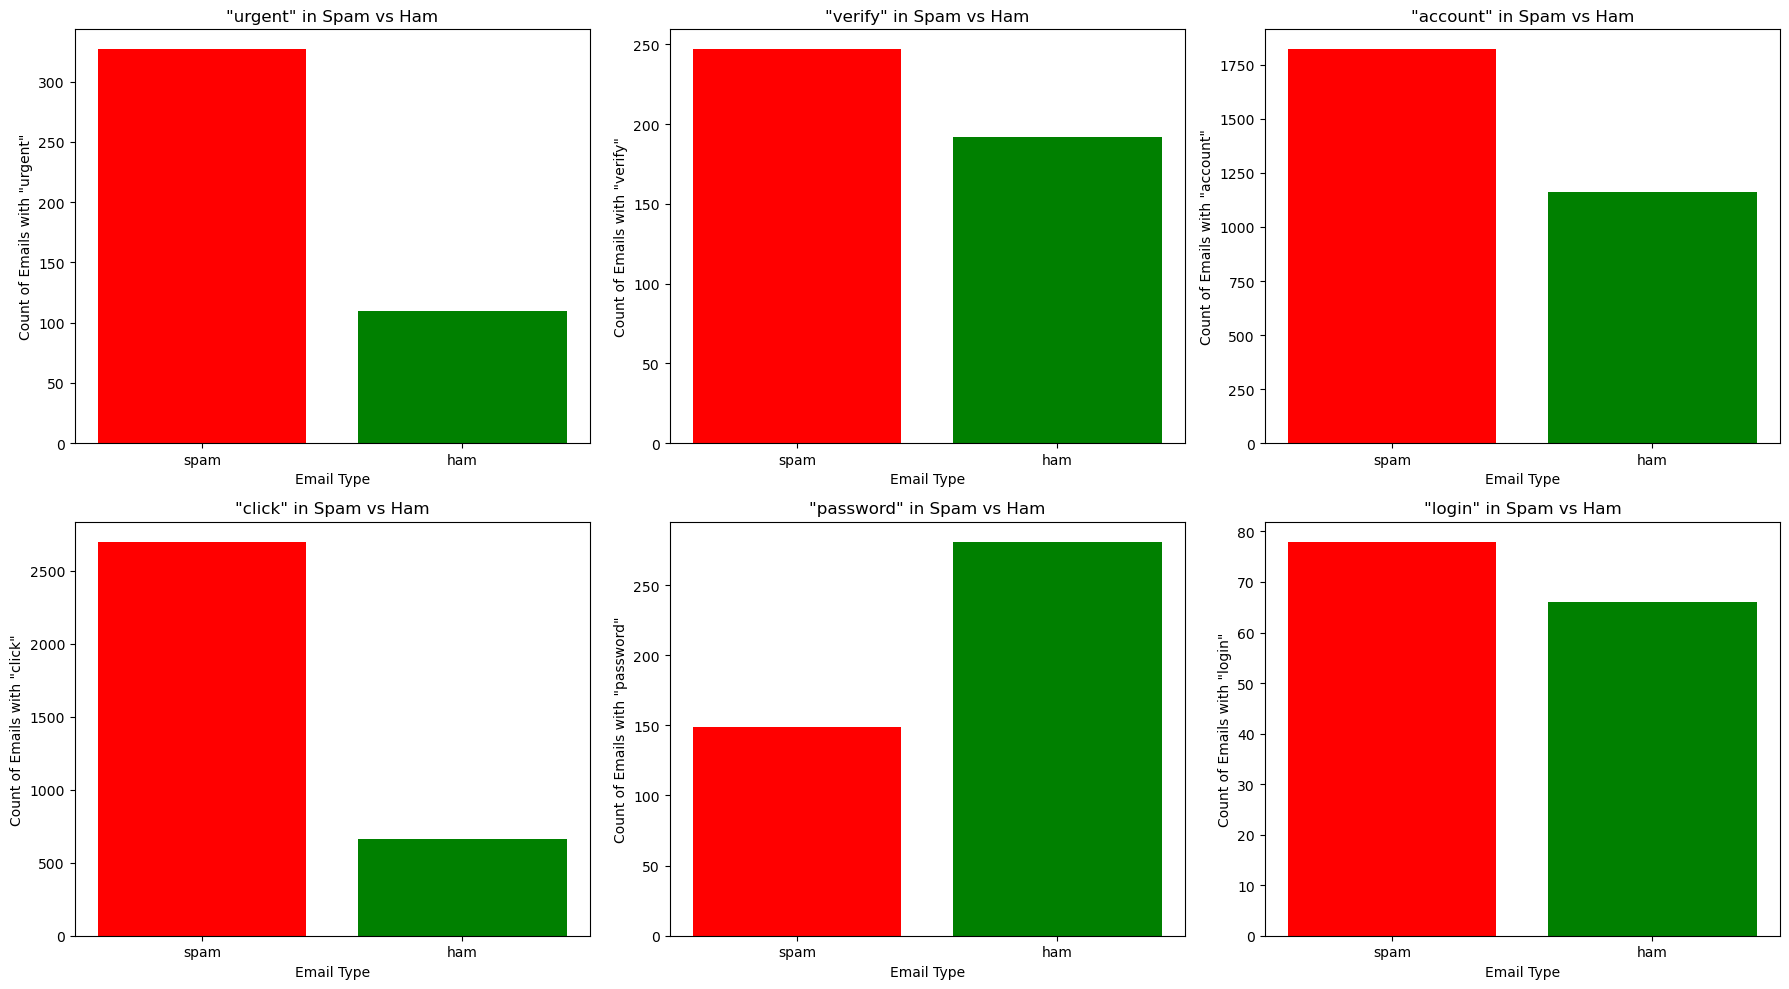

In [56]:
import matplotlib.pyplot as plt
keys = ['urgent', 'verify', 'account', 'click', 'password', 'login']
fig, axs = plt.subplots(2, 3, figsize=(18, 10))
axs = axs.flatten()
for i, key in enumerate(keys):
    spam_count = df[(df[key] == True) & (df['Spam/Ham'] == 'spam')][key].count()
    ham_count = df[(df[key] == True) & (df['Spam/Ham'] == 'ham')][key].count()
    axs[i].bar(['spam', 'ham'], [spam_count, ham_count], color=['red', 'green'])
    axs[i].set_title(f'"{key}" in Spam vs Ham')
    axs[i].set_xlabel('Email Type')
    axs[i].set_ylabel(f'Count of Emails with "{key}"')
plt.tight_layout()
plt.show()

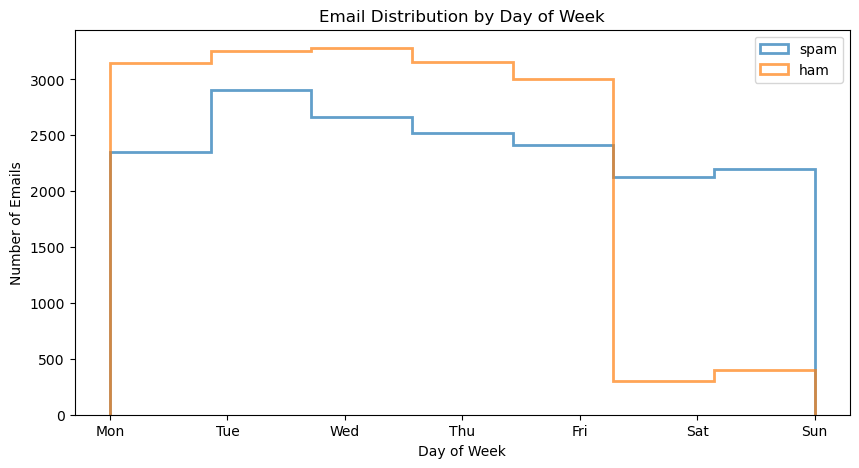

,Message ID,Subject,Message,Spam/Ham,Date,email_length,contains_urgent,urgent,verify,account,click,password,login,hour,dayofweek
0,0,christmas tree farm pictures,NaN,ham,1999-12-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,4
1,1,"vastar resources , inc .","gary , production from the high island larger ...",ham,1999-12-13,4282.0,False,False,False,False,False,False,False,0,0
2,2,calpine daily gas nomination,- calpine daily gas nomination 1 . doc,ham,1999-12-14,38.0,False,False,False,False,False,False,False,0,1
3,3,re : issue,fyi - see note below - already done .\nstella\...,ham,1999-12-14,1171.0,False,False,False,True,False,False,False,0,1
4,4,meter 7268 nov allocation,fyi .\n- - - - - - - - - - - - - - - - - - - -...,ham,1999-12-14,1124.0,False,False,False,False,False,False,False,0,1


In [66]:
## Time Based Analsysis
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

df['dayofweek'] = df['Date'].dt.dayofweek  # Monday=0, Sunday=6
day_labels = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

# Plot: Distribution of emails sent by day of week for spam and ham
plt.figure(figsize=(10, 5))
for label in ['spam','ham']:
    subset = df[df['Spam/Ham'] == label]
    plt.hist(subset['dayofweek'].dropna(), bins=7, alpha=0.7, label=label, histtype="step", linewidth=2)
plt.xlabel('Day of Week')
plt.ylabel('Number of Emails')
plt.title('Email Distribution by Day of Week')
plt.xticks(ticks=range(7), labels=day_labels)
plt.legend()
plt.show()

df.head()

In [68]:
# N-gram Analysis and Keyword Correlation
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import numpy as np

# Function to get top n n-grams
def get_top_ngrams(corpus, ngram_range=(2,2), n=None):
    vec = CountVectorizer(ngram_range=ngram_range, stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

# Top bigrams and trigrams in spam
spam_corpus = df[df['Spam/Ham']=='spam']['Message'].astype(str)
top_bigrams_spam = get_top_ngrams(spam_corpus, ngram_range=(2,2), n=10)
top_trigrams_spam = get_top_ngrams(spam_corpus, ngram_range=(3,3), n=10)

# Top bigrams and trigrams in ham
ham_corpus = df[df['Spam/Ham']=='ham']['Message'].astype(str)
top_bigrams_ham = get_top_ngrams(ham_corpus, ngram_range=(2,2), n=10)
top_trigrams_ham = get_top_ngrams(ham_corpus, ngram_range=(3,3), n=10)

print('Top 10 Bigrams in Spam:', top_bigrams_spam)
print('Top 10 Trigrams in Spam:', top_trigrams_spam)
print('Top 10 Bigrams in Ham:', top_bigrams_ham)
print('Top 10 Trigrams in Ham:', top_trigrams_ham)

# Correlation between keywords in spam emails
keywords = ['urgent', 'verify', 'account', 'click', 'password', 'login']
spam_keywords = df[df['Spam/Ham']=='spam'][keywords]
correlation = spam_keywords.corr()
print('Correlation between keywords in spam emails:')
print(correlation)

Top 10 Bigrams in Spam: [('http www', 3701), ('looking statements', 2180), ('forward looking', 1918), ('investment advice', 1486), ('information provided', 1029), ('risks uncertainties', 1020), ('email address', 960), ('best regards', 951), ('united states', 897), ('000 00', 884)]
Top 10 Trigrams in Spam: [('forward looking statements', 1843), ('securities act 1933', 750), ('www computron com', 661), ('act 1933 section', 583), ('exchange act 1934', 571), ('forward ooking statements', 562), ('securities exchange act', 549), ('meaning section 27', 538), ('number risks uncertainties', 529), ('19 jul 2005', 528)]
Top 10 Bigrams in Ham: [('hou ect', 16212), ('ect ect', 15764), ('enron enron', 6261), ('enron com', 4417), ('let know', 4216), ('vince kaminski', 4074), ('cc subject', 4068), ('original message', 3869), ('ect cc', 3764), ('corp enron', 3244)]
Top 10 Trigrams in Ham: [('hou ect ect', 13634), ('ect ect cc', 3686), ('corp enron enron', 2485), ('dbcaps 97 data', 2010), ('ect ect subj

In [69]:
# Show the strongest keyword correlations (excluding self-correlation)
import numpy as np

# Get the absolute correlation values, set diagonal to 0 to ignore self-correlation
corr_matrix = correlation.copy()
np.fill_diagonal(corr_matrix.values, 0)

# Unstack and sort to find the strongest pairs
strongest = corr_matrix.abs().unstack().sort_values(ascending=False)
# Drop duplicate pairs (since matrix is symmetric)
strongest = strongest[strongest != 0].drop_duplicates()

print("Strongest keyword correlations (excluding self-correlation):")
print(strongest.head(5))

Strongest keyword correlations (excluding self-correlation):
password  login       0.311082
urgent    account     0.265401
login     verify      0.173552
verify    account     0.156240
          password    0.141445
dtype: float64


In [ ]:
## EDA Conclusions

# - Certain keywords like "urgent" and "click" are more prevalent in spam emails.
# - Phishing emails tend to be either very short or very long, indicating different attack strategies.
# - Emails are more likely to be spam on certain days of the week (e.g., Tuesday and Wednsday).
# - N-gram analysis reveals common phrases used in spam emails that can aid in detection.
# Strongest keyword correlations (excluding self-correlation):
# password  login       0.311082
# urgent    account     0.265401
# login     verify      0.173552
# verify    account     0.156240
#           password    0.141445